In [2]:
options(repr.plot.width=4, repr.plot.height=3)
require(pheatmap)
require(data.table)
require(tidyverse)

## 1. load data

In [17]:
dat.pro_ps.wd<- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_smoothed_dy_varible.txt")%>%
    group_by(celltype)%>%spread(key = bin,value = percent_open)

head(dat.pro_ps.wd)
tail(dat.pro_ps.wd)
dim(dat.pro_ps.wd)
table(dat.pro_ps.wd$celltype)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAGAB_42733,alpha,3.8641661,4.4568743,5.0314140,5.5876162,6.1253120,6.6443324,7.144508,7.6256709,⋯,20.241210,21.036159,21.855849,22.700389,23.569889,24.464459,25.384207,26.329243,27.299677,28.295618
AASS_118936,beta,30.8721694,29.4504937,28.0715504,26.7361415,25.4450690,24.1991349,22.999141,21.8458900,⋯,15.190347,15.354458,15.528586,15.712148,15.904558,16.105233,16.313587,16.529038,16.751000,16.978890
ABCB4_117176,beta,16.8248207,15.9353944,15.0706113,14.2310510,13.4172931,12.6299171,11.869503,11.1366292,⋯,3.198395,3.182714,3.166231,3.148893,3.130644,3.111429,3.091192,3.069879,3.047434,3.023803
ABCB6_81071,beta,9.2829428,9.0544307,8.8336893,8.6206393,8.4152013,8.2172962,8.026844,7.8437668,⋯,13.433810,13.993902,14.577549,15.184122,15.812987,16.463513,17.135068,17.827020,18.538736,19.269587
ABCB9_32864,alpha,0.4323812,0.4150176,0.3984103,0.3825513,0.3674321,0.3530444,0.339380,0.3264305,⋯,4.610496,4.947564,5.297280,5.659454,6.033893,6.420405,6.818797,7.228878,7.650455,8.083337
ABCB9_32864,beta,7.7690195,7.2124705,6.6725025,6.1497342,5.6447847,5.1582726,4.690817,4.2430361,⋯,3.143808,3.280719,3.421437,3.565924,3.714144,3.866056,4.021624,4.180810,4.343576,4.509884


gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZSCAN5A_73073,beta,3.9704991,3.9396654,3.9113757,3.885237,3.8608545,3.8378363,3.8157885,3.7943178,⋯,8.095005,8.090843,8.086262,8.080977,8.074698,8.067141,8.058016,8.047038,8.033918,8.018371
ZSWIM2_79591,beta,28.4467168,27.3249049,26.2329936,25.171964,24.1427961,23.1464716,22.1839709,21.2562750,⋯,7.052941,7.144655,7.243188,7.348604,7.460966,7.580338,7.706783,7.840366,7.981148,8.129196
ZSWIM7_53953,alpha,20.4340939,19.8208247,19.2237919,18.643501,18.0804583,17.5351688,17.0081383,16.4998726,⋯,25.155638,26.490371,27.878573,29.319195,30.811189,32.353506,33.945097,35.584912,37.271903,39.005021
ZUFSP_112980,beta,19.2490226,18.3035074,17.3845624,16.493199,15.6304287,14.7972630,13.9947135,13.2237918,⋯,9.367259,9.716468,10.076786,10.448185,10.830640,11.224124,11.628609,12.044070,12.470480,12.907812
ZZEF1_52563,beta,0.1992746,0.2273509,0.2543777,0.280261,0.3049068,0.3282211,0.3501098,0.3704791,⋯,1.372181,1.454360,1.539635,1.627949,1.719245,1.813465,1.910554,2.010453,2.113105,2.218453
ZZZ3_5178,alpha,12.6591865,13.0673987,13.4613818,13.840516,14.2041818,14.5517591,14.8826283,15.1961696,⋯,34.542945,36.055159,37.624589,39.250229,40.931074,42.666119,44.454359,46.294789,48.186402,50.128195


[1] 2330  102


alpha  beta 
 1107  1223 

In [23]:
range(dat.pro_ps.wd[,-(1:2)])
range(apply(dat.pro_ps.wd[,-(1:2)],1,max))

[1] -1.754962 75.008241

[1]  0.2998986 75.0082413

## 2. updated cluster 
[QuickR](https://www.statmethods.net/advstats/cluster.html) introduces the following methods categories:
1. Partitioning based methods or Centroid-based clustering: `kmeans`, `pam`
2. Hierarchical Agglomerative: `hclust`, `pvclust`
3. Model based: `mclust`
4. Density-based: [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN)

More complete intro can be found [cluster analysis@WIKI](https://en.wikipedia.org/wiki/Cluster_analysis)
Also they introduced:
1. cluster compare: `fpc::cluster.stats`

Because the goal is to find dynamical patterns, I would like to choose 1. (i.e. kmeans or pam)


In [18]:
require(fpc)
dat.sub <- dat.pro_ps.wd%>%
    as.data.frame()%>%
    filter(celltype=='beta')%>%
    column_to_rownames("gene_tr.idx")%>%
    select(-celltype)

### 2.2 filter bottom < 5% 

tr.keep
FALSE  TRUE 
  144  1079 

2  clusters  0.3071341 
3  clusters  0.3827657 
4  clusters  0.334371 
5  clusters  0.3096644 
6  clusters  0.2730971 
7  clusters  0.2439419 
8  clusters  0.2561467 
9  clusters  0.2580954 
10  clusters  0.2486196 



  1   2   3 
472 364 243 

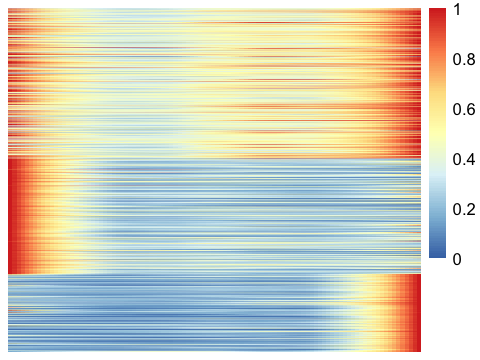

In [24]:
tr.keep <- apply(dat.sub,1,max)>=5
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
dat.sub.2.scale[dat.sub.2.scale<0]<- 0
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
                           
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
                           

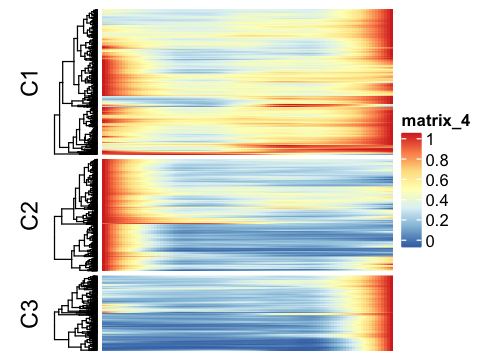

In [15]:
options(repr.plot.width=4, repr.plot.height=3)

require(ComplexHeatmap)
require(RColorBrewer)
require(circlize)
Heatmap(dat.sub.2.scale,
        col=colorRamp2(seq(0,1,length.out = 99),colorRampPalette(rev(brewer.pal(n = 7, name =
    "RdYlBu")))(99)),
        cluster_columns=F,
        split = paste0("C",pk.scale$pamobject$clustering),
       show_row_names=F,show_column_names=F)

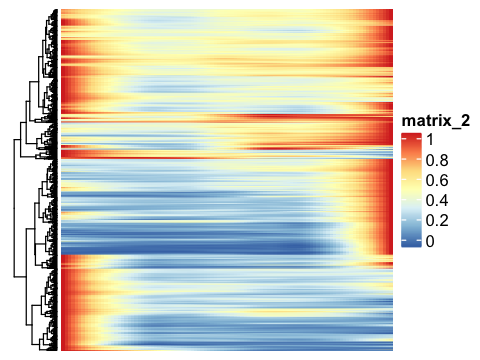

In [7]:
Heatmap(dat.sub.2.scale,
        col=colorRamp2(seq(0,1,length.out = 99),colorRampPalette(rev(brewer.pal(n = 7, name =
    "RdYlBu")))(99)),
        cluster_columns=F,
       show_row_names=F,show_column_names=F)

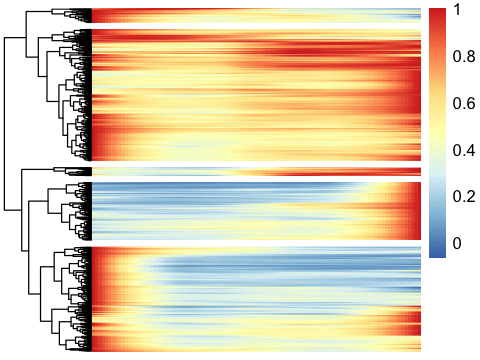

In [34]:
pheatmap(dat.sub.2.scale,cutree_rows = 5,
         scale="none",cluster_rows = T,cluster_cols = F,
         show_rownames = F,show_colnames = F)


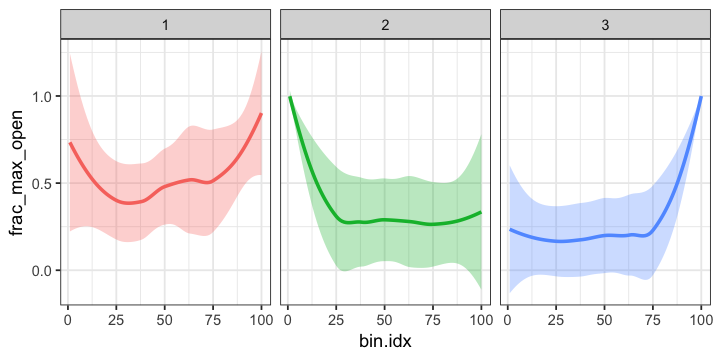

In [10]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data.frame(dat.sub.2.scale,clust=pk.scale$pamobject$clustering)%>%
        rownames_to_column("gene.tr")%>%
        gather(key = "bin.idx",value = 'frac_max_open',2:101)%>%
        mutate(bin.idx=as.numeric(sub("X","",bin.idx))),
       aes(bin.idx,frac_max_open,group=clust,color=as.factor(clust)))+
    stat_summary(fun.data = 'mean_sdl', geom = 'smooth',se=T,aes(fill=as.factor(clust)),
                 alpha=0.3)+
facet_wrap(~clust)+theme_bw()+theme(legend.position = "none")

In [11]:
pk.list<-sapply(unique(pk.scale$pamobject$clustering),function(x)
        unique(unlist(sapply(names(which(pk.scale$pamobject$clustering==x)), function(y) 
            unlist(strsplit(y,split = "_"))[1]))))
str(pk.list)

## go enrich                             
require(enrichR)
dbs <- listEnrichrDbs()                 
pk.list.gene.enrichr <- lapply(pk.list,function(x) 
    enrichr(x, c("GO_Biological_Process_2018"))$GO_Biological_Process_2018)
                             

List of 3
 $ : chr [1:469] "AASS" "ABCB6" "ABHD5" "ABTB2" ...
 $ : chr [1:358] "ABCB4" "ABCB9" "ABCC4" "ABCC8" ...
 $ : chr [1:238] "ABHD2" "AC002472.13" "AC018867.1" "AC092675.3" ...


Loading required package: enrichR


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [13]:
head(pk.list.gene.enrichr[[1]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[2]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[3]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))

Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
negative regulation of translation in response to stress (GO:0032055),3/7,3,7,0.0004180246,0.3324976,0.001429111,0.620624,-3.114408,24.23000,RBM4;SESN2;EIF2S1
endoplasmic reticulum membrane organization (GO:0090158),3/7,3,7,0.0004180246,0.3324976,0.001429111,0.620624,-2.605356,20.26959,STX18;ATL2;RTN4
establishment of protein localization to endoplasmic reticulum (GO:0072599),4/16,4,16,0.0004342590,0.3324976,0.001142940,0.620624,-2.138264,16.55416,SPCS3;RYR2;SRP14;RAB3GAP1
regulation of hydrolase activity (GO:0051336),8/81,8,81,0.0006197436,0.3558878,0.001281492,0.620624,-1.415418,10.45457,VAV3;FGD4;CHN1;RDX;ARHGAP1;RAB3GAP1;PAFAH1B1;EPHB3
purine ribonucleotide catabolic process (GO:0009154),4/20,4,20,0.0010732254,0.4463169,0.002325026,0.620624,-1.780583,12.17400,HINT1;PDE5A;AMPD3;NUDT3
endoplasmic reticulum organization (GO:0007029),5/35,5,35,0.0012607641,0.4463169,0.002496888,0.620624,-1.649638,11.01304,VMP1;STX18;ATL2;TMCC1;RTN4


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
positive regulation of DNA replication (GO:0045740),6/36,6,36,3.903134e-05,0.04400530,8.543386e-05,0.06383890,-2.182624,22.156136,BMP4;KITLG;PDGFC;EGFR;FGF10;INS
regulation of peptidyl-tyrosine phosphorylation (GO:0050730),8/86,8,86,1.535119e-04,0.05786603,2.456503e-04,0.08779543,-1.901700,16.700220,GHR;EPHA7;INS-IGF2;BANK1;CD44;EGFR;FGF10;INS
regulation of nitric-oxide synthase activity (GO:0050999),5/37,5,37,4.863907e-04,0.09111765,8.038632e-04,0.13221654,-1.994801,15.217338,CAV1;NPR3;GLA;EGFR;INS
regulation of secretion by cell (GO:1903530),6/57,6,57,5.304142e-04,0.09111765,8.138679e-04,0.13221654,-1.767820,13.332635,RIMS1;MCTP1;SYT1;RAB15;SNCAIP;INS
modulation of chemical synaptic transmission (GO:0050804),7/83,7,83,7.183966e-04,0.10698123,1.027167e-03,0.15296227,-1.404456,10.166136,RIMS1;MCTP1;SYT1;BDNF;GRM8;SNCAIP;GRIA4
positive regulation of cell projection organization (GO:0031346),6/64,6,64,9.869572e-04,0.13566865,1.418295e-03,0.19496095,-1.207353,8.355949,TENM3;LRRC7;STMN2;ZNF804A;NDNF;INS


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
organophosphate ester transport (GO:0015748),4/26,4,26,0.0002379178,0.1349938,0.0004556044,0.2315842,-1.934753,16.14278,PITPNM1;STARD7;PITPNB;STARD10
negative regulation of anoikis (GO:2000811),3/16,3,16,0.0008309723,0.1921920,0.0014921995,0.2898294,-2.194326,15.56417,ITGB1;BCL2;PDK4
regulation of non-motile cilium assembly (GO:1902855),2/7,2,7,0.0028470016,0.2055958,0.0050225206,0.2898294,-3.393550,19.89126,SEPT7;MAP4
activation of transmembrane receptor protein tyrosine kinase activity (GO:0007171),2/7,2,7,0.0028470016,0.2055958,0.0050225206,0.2898294,-2.785872,16.32936,ANGPT1;PRLR
regulation of ATP biosynthetic process (GO:2001169),2/9,2,9,0.0048044823,0.2055958,0.0075514198,0.2910893,-2.606849,13.91590,FLCN;PPARGC1A
regulation of anoikis (GO:2000209),3/21,3,21,0.0018888136,0.2055958,0.0029806721,0.2898294,-2.176593,13.65117,ITGB1;BCL2;PDK4


### Subclustering 

2  clusters  0.2616352 
3  clusters  0.273356 
4  clusters  0.1994859 
5  clusters  0.2045645 
6  clusters  0.2028677 
7  clusters  0.1995525 
8  clusters  0.1995075 
9  clusters  0.1906893 
10  clusters  0.1968233 

  1   2   3 
205 179  88 
2  clusters  0.363463 
3  clusters  0.2491636 
4  clusters  0.2452465 
5  clusters  0.2440901 
6  clusters  0.217891 
7  clusters  0.2117794 
8  clusters  0.2008564 
9  clusters  0.2140388 
10  clusters  0.2114873 

  1   2 
129 235 


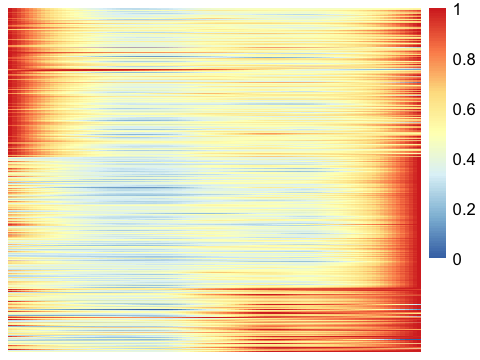

2  clusters  0.4258188 
3  clusters  0.2957326 
4  clusters  0.2630325 
5  clusters  0.2794879 
6  clusters  0.2724392 
7  clusters  0.2680295 
8  clusters  0.2742099 
9  clusters  0.2493524 
10  clusters  0.2652093 

  1   2 
146  97 


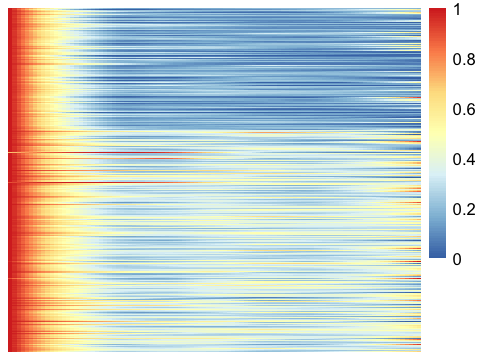

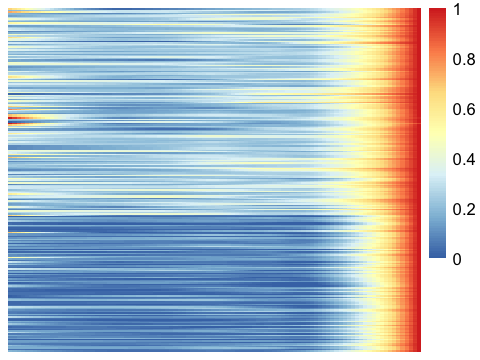

In [25]:
pk.scale.2 <- list()
for(i in 1:3){
    #cat(paste0("For Cluster ",i,"\n"))
    dat.sub.2.scale.1 <- dat.sub.2.scale[pk.scale$pamobject$clustering==i,]
    pk.scale.2[[i]]<- pamk(dat.sub.2.scale.1,critout=T)
    print(table(pk.scale.2[[i]]$pamobject$clustering))
    pheatmap(dat.sub.2.scale.1[order(pk.scale.2[[i]]$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
}




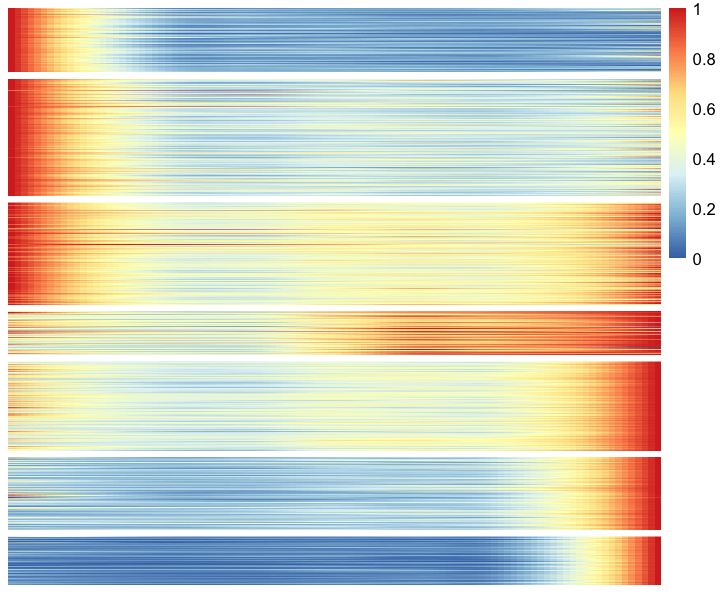

In [27]:
# 
a=(pk.scale.2[[1]]$pamobject$clustering)
b1=ifelse(a==1,3,ifelse(a==2,5,4))
names(b1)=names(a)

a=(pk.scale.2[[2]]$pamobject$clustering)
b2=ifelse(a==1,1,2)
names(b2)=names(a)

a=(pk.scale.2[[3]]$pamobject$clustering)
b3=ifelse(a==1,6,7)
names(b3)=names(a)



final.ord = c(b1,b2,b3)


options(repr.plot.width=6, repr.plot.height=5)

pheatmap(dat.sub.2.scale[names(final.ord)[order(final.ord)],],
         gaps_row = as.numeric(cumsum(table(final.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [31]:
table(final.ord)

final.ord
  1   2   3   4   5   6   7 
129 235 205  88 179 146  97 

In [29]:
pk.list<-sapply(1:7,function(x)
        unique(unlist(sapply(names(which(final.ord==x)), function(y) 
            unlist(strsplit(y,split = "_"))[1]))))
str(pk.list)

## go enrich                             
require(enrichR)
dbs <- listEnrichrDbs()                 
pk.list.gene.enrichr <- lapply(pk.list,function(x) 
    enrichr(x, c("GO_Biological_Process_2018"))$GO_Biological_Process_2018)
                             

List of 7
 $ : chr [1:129] "ABCB4" "ABCB9" "ADAMTS19" "AHRR" ...
 $ : chr [1:233] "ABCC4" "ABCC8" "ADAMTS1" "ADAMTS5" ...
 $ : chr [1:205] "AASS" "ABTB2" "ACTL6A" "AFF1" ...
 $ : chr [1:88] "AC092675.3" "ADAM15" "AGPAT9" "AL133373.1" ...
 $ : chr [1:178] "ABCB6" "ABHD5" "ACSS3" "ADM" ...
 $ : chr [1:144] "ABHD2" "AC002472.13" "AC018867.1" "AC092675.3" ...
 $ : chr [1:96] "ADAM10" "ANGPT1" "ANXA10" "ARID3A" ...
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Bi

In [30]:
head(pk.list.gene.enrichr[[1]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[2]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[3]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[4]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[5]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))

head(pk.list.gene.enrichr[[6]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))
head(pk.list.gene.enrichr[[7]]%>%
    separate(Overlap,into = c("n.hit","n.tot"),sep = "/",remove = F,convert = T)%>%
    filter(n.tot<=100)%>%arrange(Adjusted.P.value))


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
aromatic compound catabolic process (GO:0019439),2/7,2,7,0.0008487442,0.1026485,0.0016032580,0.1686,-3.645813,25.78229,PON3;PON1
regulation of endothelial cell chemotaxis to fibroblast growth factor (GO:2000544),2/8,2,8,0.0011268796,0.1026485,0.0019951851,0.1686,-3.723695,25.27757,FGF18;FGF2
carboxylic acid catabolic process (GO:0046395),3/29,3,29,0.0008473191,0.1026485,0.0013179723,0.1686,-2.342432,16.56903,PON3;PON1;FGF2
response to hexose (GO:0009746),3/28,3,28,0.0007632470,0.1026485,0.0012003136,0.1686,-1.905339,13.67639,SLC30A8;INS-IGF2;INS
regulation of secretion by cell (GO:1903530),4/57,4,57,0.0005008538,0.1026485,0.0007854224,0.1686,-1.775462,13.49209,RIMS1;SYT1;SNCAIP;INS
positive regulation of insulin receptor signaling pathway (GO:0046628),2/8,2,8,0.0011268796,0.1026485,0.0019951851,0.1686,-1.970047,13.37328,INS-IGF2;INS


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of metaphase/anaphase transition of cell cycle (GO:1902099),2/9,2,9,0.004609703,0.4650905,0.006380817,0.4672727,-3.055125,16.43532,CENPE;RIOK2
indolalkylamine metabolic process (GO:0006586),2/7,2,7,0.002730673,0.4650905,0.004238238,0.4672727,-2.599457,15.34513,TPH2;DDC
positive regulation of intracellular steroid hormone receptor signaling pathway (GO:0033145),2/11,2,11,0.006935309,0.4650905,0.008917648,0.4672727,-2.947442,14.65212,FOXA1;LMO3
calcium ion regulated exocytosis (GO:0017156),2/12,2,12,0.008258824,0.4650905,0.010328149,0.4672727,-2.830869,13.57819,RIMS1;SYT7
negative regulation of T cell differentiation (GO:0045581),2/12,2,12,0.008258824,0.4650905,0.010328149,0.4672727,-2.822656,13.53879,BMP4;GLI3
heterophilic cell-cell adhesion via plasma membrane cell adhesion molecules (GO:0007157),4/48,4,48,0.002337562,0.4650905,0.002674800,0.4672727,-2.105577,12.75695,PTPRD;TENM2;TENM3;FAT4


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"fatty acid elongation, saturated fatty acid (GO:0019367)",2/8,2,8,0.0028109036,0.5080886,0.004196048,0.5116683,-2.950108,17.32967,ELOVL4;ELOVL5
regulation of stem cell proliferation (GO:0072091),3/17,3,17,0.0006490342,0.5080886,0.000970538,0.5116683,-2.256254,16.56096,EPCAM;LRRK2;HMGA2
"fatty acid elongation, unsaturated fatty acid (GO:0019368)",2/8,2,8,0.0028109036,0.5080886,0.004196048,0.5116683,-2.785671,16.36373,ELOVL4;ELOVL5
"fatty acid elongation, polyunsaturated fatty acid (GO:0034626)",2/8,2,8,0.0028109036,0.5080886,0.004196048,0.5116683,-2.743769,16.11758,ELOVL4;ELOVL5
negative regulation of protein maturation (GO:1903318),2/11,2,11,0.0054107120,0.5080886,0.007132358,0.5116683,-2.946517,15.37898,SERPINE2;LRRK2
regulation of synaptic vesicle cycle (GO:0098693),2/12,2,12,0.0064492391,0.5080886,0.008267126,0.5116683,-2.793756,14.09113,RIMS2;LRRK2


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
membrane raft assembly (GO:0001765),2/7,2,7,0.0003962347,0.1649282,0.0008318882,0.2838829,-3.900344,30.55336,ANXA2;FLOT1
regulation of toll-like receptor 3 signaling pathway (GO:0034139),2/8,2,8,0.0005268007,0.1649282,0.0010365699,0.2838829,-3.894866,29.40113,FLOT1;TNFAIP3
membrane raft organization (GO:0031579),2/11,2,11,0.0010259326,0.1649282,0.0017797310,0.2838829,-2.973102,20.46134,ANXA2;FLOT1
regulation of skeletal muscle tissue development (GO:0048641),2/13,2,13,0.0014466538,0.1649282,0.0023806777,0.2838829,-2.719119,17.77896,DDX17;FLOT1
protein kinase C signaling (GO:0070528),2/12,2,12,0.0012275998,0.1649282,0.0020697919,0.2838829,-2.521698,16.90217,ADAM15;FLOT1
endothelial cell differentiation (GO:0045446),2/14,2,14,0.0016829413,0.1649282,0.0027121833,0.2838829,-2.429610,15.51843,KDM6B;PROX1


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
endoplasmic reticulum membrane organization (GO:0090158),3/7,3,7,2.363287e-05,0.02106860,9.705001e-05,0.06701303,-2.605356,27.75452,STX18;ATL2;RTN4
neuron migration (GO:0001764),5/41,5,41,3.051210e-05,0.02106860,7.355067e-05,0.06701303,-1.616542,16.80781,NR4A2;NRP1;FGFR1;PAFAH1B1;VEGFA
branching involved in blood vessel morphogenesis (GO:0001569),3/15,3,15,2.915078e-04,0.08796528,6.240255e-04,0.17235583,-2.264120,18.43094,NRP1;TGFBR2;VEGFA
axonal transport (GO:0098930),4/37,4,37,3.184840e-04,0.08796528,6.105615e-04,0.17235583,-1.571522,12.65380,BLOC1S3;KIF1B;AP3B2;PAFAH1B1
cell chemotaxis (GO:0060326),5/61,5,61,2.098246e-04,0.08796528,4.116793e-04,0.17235583,-1.477643,12.51451,NRP1;ELMO2;ARRB2;VEGFA;HBEGF
embryo development ending in birth or egg hatching (GO:0009792),3/18,3,18,5.126190e-04,0.11798780,9.960290e-04,0.22925268,-2.114365,16.01838,STOX2;UBR3;FGFR1


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
positive regulation of chromosome segregation (GO:0051984),2/12,2,12,0.003240773,0.3207701,0.004361402,0.341525,-3.073362,17.61634,RCC2;RAD18
regulation of ATP biosynthetic process (GO:2001169),2/9,2,9,0.001792923,0.3207701,0.002673155,0.341525,-2.633179,16.65198,FLCN;PPARGC1A
positive regulation of autophagy (GO:0010508),4/68,4,68,0.001468630,0.3207701,0.001751358,0.341525,-2.225107,14.51532,SH3GLB1;FLCN;STK11;TBK1
B cell activation involved in immune response (GO:0002312),2/14,2,14,0.004426382,0.3207701,0.005697974,0.341525,-2.559043,13.87046,GPR183;LIG4
regulation of catabolic process (GO:0009894),2/13,2,13,0.003811976,0.3207701,0.005008996,0.341525,-2.449454,13.64250,ITGB1;NEDD4L
negative regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway (GO:1902236),2/15,2,15,0.005083350,0.3207701,0.006427721,0.341525,-2.332497,12.31975,SYVN1;HSPA1A


Term,Overlap,n.hit,n.tot,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
positive regulation of receptor-mediated endocytosis (GO:0048260),4/42,4,42,4.851044e-05,0.04331982,9.119385e-05,0.08143611,-2.056493,20.428652,RAB21;ANGPT1;TBC1D5;PICALM
regulation of non-motile cilium assembly (GO:1902855),2/7,2,7,4.713738e-04,0.09782524,9.272681e-04,0.15333567,-3.414868,26.157409,SEPT7;MAP4
regulation of telomerase activity (GO:0051972),3/43,3,43,1.150752e-03,0.10276217,1.717085e-03,0.15333567,-1.880813,12.728101,GRHL2;TP53;WRAP53
positive regulation of cellular metabolic process (GO:0031325),4/93,4,93,1.049934e-03,0.10276217,1.587512e-03,0.15333567,-1.543602,10.587610,ANGPT1;TBC1D5;INHBA;TP53
positive regulation of cell growth (GO:0030307),4/99,4,99,1.324365e-03,0.10751434,1.979107e-03,0.16066749,-1.297224,8.596476,USP47;RUFY3;BCL2;ADAM10
negative regulation of anoikis (GO:2000811),2/16,2,16,2.618781e-03,0.16704085,3.823954e-03,0.24391364,-2.187299,13.003593,BCL2;PDK4
